#Milestone 1: Data Preparation Report

##1. Exploratory Data Analysis (EDA)

In [42]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report

# Load the dataset
creditscore = pd.read_csv('train.csv')
# Interpretation: This loads the dataset into a DataFrame for exploration and analysis.

<ipython-input-42-9541df41d4bb>:19: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  creditscore = pd.read_csv('train.csv')


In [43]:
# Check the number of rows and columns
creditscore.shape

# Interpretation: The shape tells us how many rows (samples) and columns (features) are present.

(100000, 28)

In [44]:
# View data types and non-null counts
creditscore.info()

# Interpretation: This displays the data types (e.g., int64, float64, object) and the number of non-null values, helping detect missing data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [45]:
# Display column names
creditscore.columns

# Interpretation: This lists the column names, ensuring we know which variables we're working with.

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [46]:
# Display the first 5 rows
creditscore.head()

# Interpretation: This gives a preview of the first few rows of the dataset, which helps verify that the data was loaded correctly.

ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt Credit_Utilization_Ratio     Credit_History_Age  \
0            809.98                26.822620  22 Years and 1 Months   
1            809.98                31.944960                    NaN   
2            809.98                28.609352  22 Years and 3 Months   
3            809.98                31.377862  22 Years and 4 Months   
4            809.98                24.797347  22 Years and 5 Months   

   Payment_of_Min_Amount Total_EMI_per_month Amount_invested_monthly  \
0                     No           49.574949       80.41529543900253   
1                     No           49.574949      118.28022162236736   
2                     No           49.574949         81.699521264648   
3                     No           49.574949       199.4580743910713   
4                     No           49.574949      41.420153086217326   

                  Payment_Behaviour     Monthly_Balance Credit_Score  
0   High_spent_Small_value_payments  312.49408867943663         Good  
1    Low_spent_Large_value_payments  284.62916249607184         Good  
2   Low_spent_Medium_value_payments   331.2098628537912         Good  
3    Low_spent_Small_value_payments  223.45130972736786         Good  
4  High_spent_Medium_value_payments  341.48923103222177         Good  

[5 rows x 28 columns]

In [47]:
# Display the data types
creditscore.dtypes

# Interpretation: Identify the name and type (continuous or categorical) for each variable in the dataset.

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                 object
dtype: object

In [48]:
# Check the number of unique values in each column
creditscore.nunique()

# Interpretation: Knowing the number of unique values helps us understand the variety in each column, especially categorical variables.

ID                          100000
Customer_ID                  12500
Month                            8
Name                         10139
Age                           1788
SSN                          12501
Occupation                      16
Annual_Income                18940
Monthly_Inhand_Salary        13235
Num_Bank_Accounts              943
Num_Credit_Card               1179
Interest_Rate                 1750
Num_of_Loan                    434
Type_of_Loan                  6260
Delay_from_due_date             73
Num_of_Delayed_Payment         749
Changed_Credit_Limit          4384
Num_Credit_Inquiries          1223
Credit_Mix                       4
Outstanding_Debt             13178
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          14950
Amount_invested_monthly      91049
Payment_Behaviour                7
Monthly_Balance              98792
Credit_Score                     3
dtype: int64

In [49]:
# Descriptive statistics of numerical columns
creditscore.describe()

# Interpretation: Summary statistics for numerical features

Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
count           84998.000000      100000.000000     100000.00000   
mean             4194.170850          17.091280         22.47443   
std              3183.686167         117.404834        129.05741   
min               303.645417          -1.000000          0.00000   
25%              1625.568229           3.000000          4.00000   
50%              3093.745000           6.000000          5.00000   
75%              5957.448333           7.000000          7.00000   
max             15204.633333        1798.000000       1499.00000   

       Interest_Rate  Delay_from_due_date  Num_Credit_Inquiries  \
count  100000.000000        100000.000000          98035.000000   
mean       72.466040            21.068780             27.754251   
std       466.422621            14.860104            193.177339   
min         1.000000            -5.000000              0.000000   
25%         8.000000            10.000000              3.000000   
50%        13.000000            18.000000              6.000000   
75%        20.000000            28.000000              9.000000   
max      5797.000000            67.000000           2597.000000   

       Credit_Utilization_Ratio  Total_EMI_per_month  
count             100000.000000        100000.000000  
mean                  32.285173          1403.118217  
std                    5.116875          8306.041270  
min                   20.000000             0.000000  
25%                   28.052567            30.306660  
50%                   32.305784            69.249473  
75%                   36.496663           161.224249  
max                   50.000000         82331.000000

In [50]:
# Get value counts for the sex column (categorical variable)
creditscore['Credit_Mix'].value_counts()

# Interpretation: This shows how many of each Credit_Mix are in the dataset. It shows there are more standard.

Credit_Mix
Standard    36479
Good        24337
_           20195
Bad         18989
Name: count, dtype: int64

In [51]:
# Get proportion with counts for the Sex column (categorical variable)
creditscore['Credit_Mix'].value_counts(normalize=True)

# Interpretation: This shows the percentage distribution of each Credit_Mix are in the dataset. It shows there are more standard.

Credit_Mix
Standard    0.36479
Good        0.24337
_           0.20195
Bad         0.18989
Name: proportion, dtype: float64

In [52]:
# Get value counts for the sex column (categorical variable)
creditscore['Occupation'].value_counts()

# Interpretation: This shows how many of each Occupation are in the dataset. It shows there are more lawer.

Occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64

In [53]:
# Get proportion with counts for the Sex column (categorical variable)
creditscore['Occupation'].value_counts(normalize=True)

# Interpretation: This shows the percentage distribution of each Occupation are in the dataset. It shows there are more lawer.

Occupation
_______          0.07062
Lawyer           0.06575
Architect        0.06355
Engineer         0.06350
Scientist        0.06299
Mechanic         0.06291
Accountant       0.06271
Developer        0.06235
Media_Manager    0.06232
Teacher          0.06215
Entrepreneur     0.06174
Doctor           0.06087
Journalist       0.06085
Manager          0.05973
Musician         0.05911
Writer           0.05885
Name: proportion, dtype: float64

In [54]:
# Get value counts for the sex column (categorical variable)
creditscore['Credit_Score'].value_counts()

# Interpretation: This shows how many of each Credit_Score are in the dataset. It shows there are more standard.

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

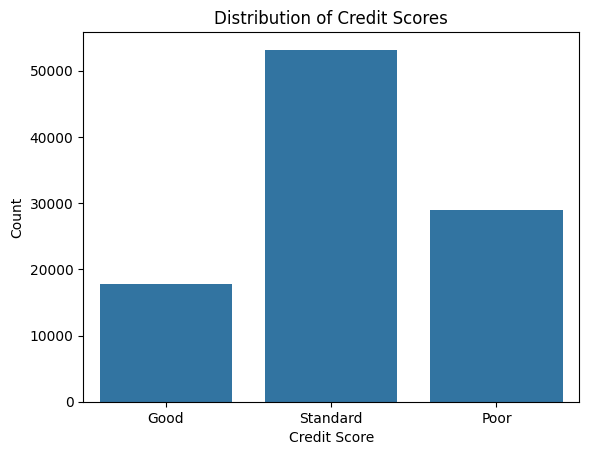

In [55]:
sns.countplot(data=creditscore, x='Credit_Score')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.title('Distribution of Credit Scores')
plt.show()

# Interpretation: This shows how many of each Credit_Score are in the dataset. It shows there are more standard.

In [56]:
# Get proportion with counts for the Sex column (categorical variable)
creditscore['Credit_Score'].value_counts(normalize=True)

# Interpretation: This shows the percentage distribution of each Credit_Score are in the dataset. It shows there are more standard.

Credit_Score
Standard    0.53174
Poor        0.28998
Good        0.17828
Name: proportion, dtype: float64

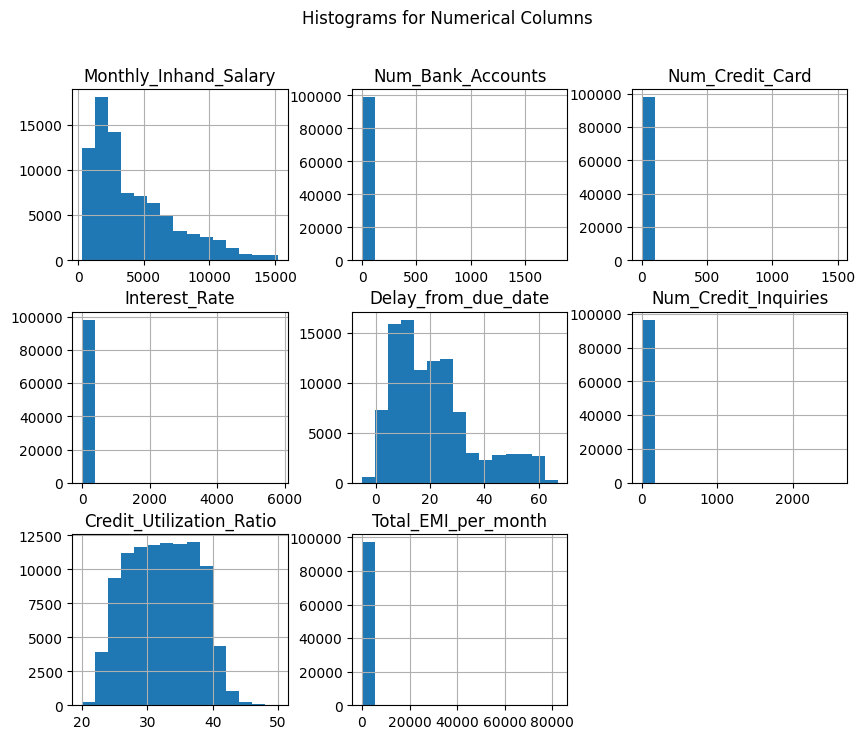

In [57]:
# Plot histograms for all numerical columns
creditscore.hist(bins=15, figsize=(10, 8))
plt.suptitle('Histograms for Numerical Columns')
plt.show()

# Interpretation: Histograms help visualize the distribution of numerical data, and detect skewness or outliers.
# Interpretation: Feature 'Monthly_Inhand_Salary', 'Delay_from_due_date'are right skewness. These features may have outliers.

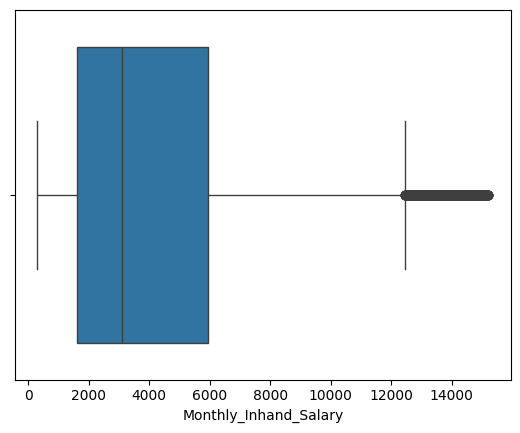

In [58]:
# Boxplot for detecting outliers in Monthly_Inhand_Salary
sns.boxplot(data=creditscore, x='Monthly_Inhand_Salary')
plt.show()

# Interpretation: Boxplots show the spread of the data, including the interquartile range, and help detect outliers. The median Monthly_Inhand_Salary is near the lower end of the Monthly_Inhand_Salary range, suggesting that the majority of Monthly_Inhand_Salary are low. There are some high Monthly_Inhand_Salary are outliers.

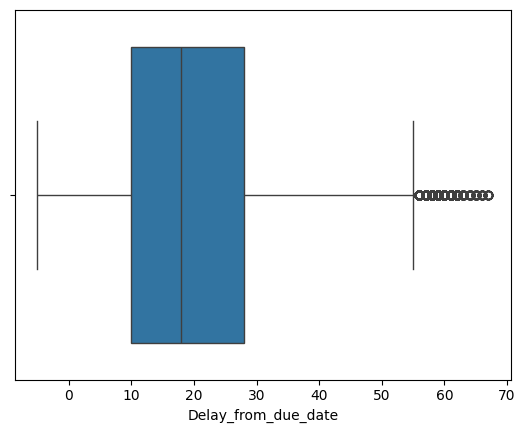

In [59]:
# Boxplot for detecting outliers in Fare
sns.boxplot(data=creditscore, x='Delay_from_due_date')
plt.show()

# Interpretation: The median age is near the 30, suggesting that the majority of ages are 20-40. There are some old passengers are outliers.

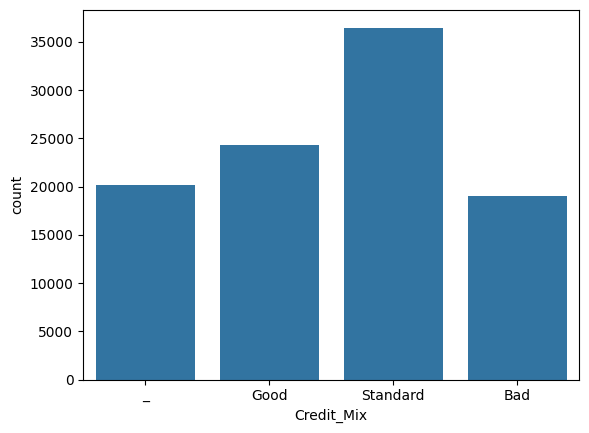

In [60]:
# Bar chart for the Credit_Mix column
sns.countplot(x='Credit_Mix', data=creditscore)
plt.show()

# Interpretation: Bar charts show the frequency of each category in a categorical variable, useful for analyzing class imbalance.

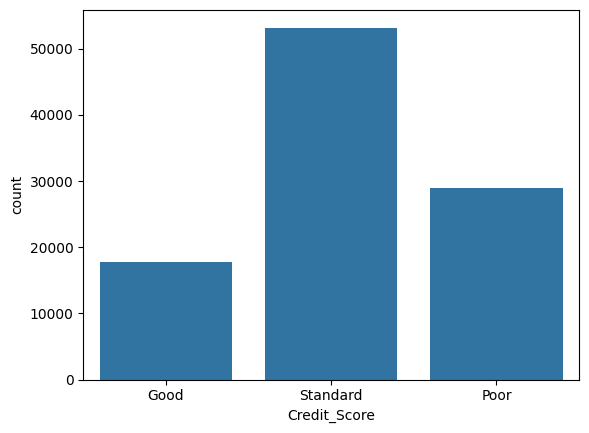

In [61]:
# Bar chart for the Credit_Score column
sns.countplot(x='Credit_Score', data=creditscore)
plt.show()

# Interpretation: Bar charts show the frequency of each category in a categorical variable, useful for analyzing class imbalance.

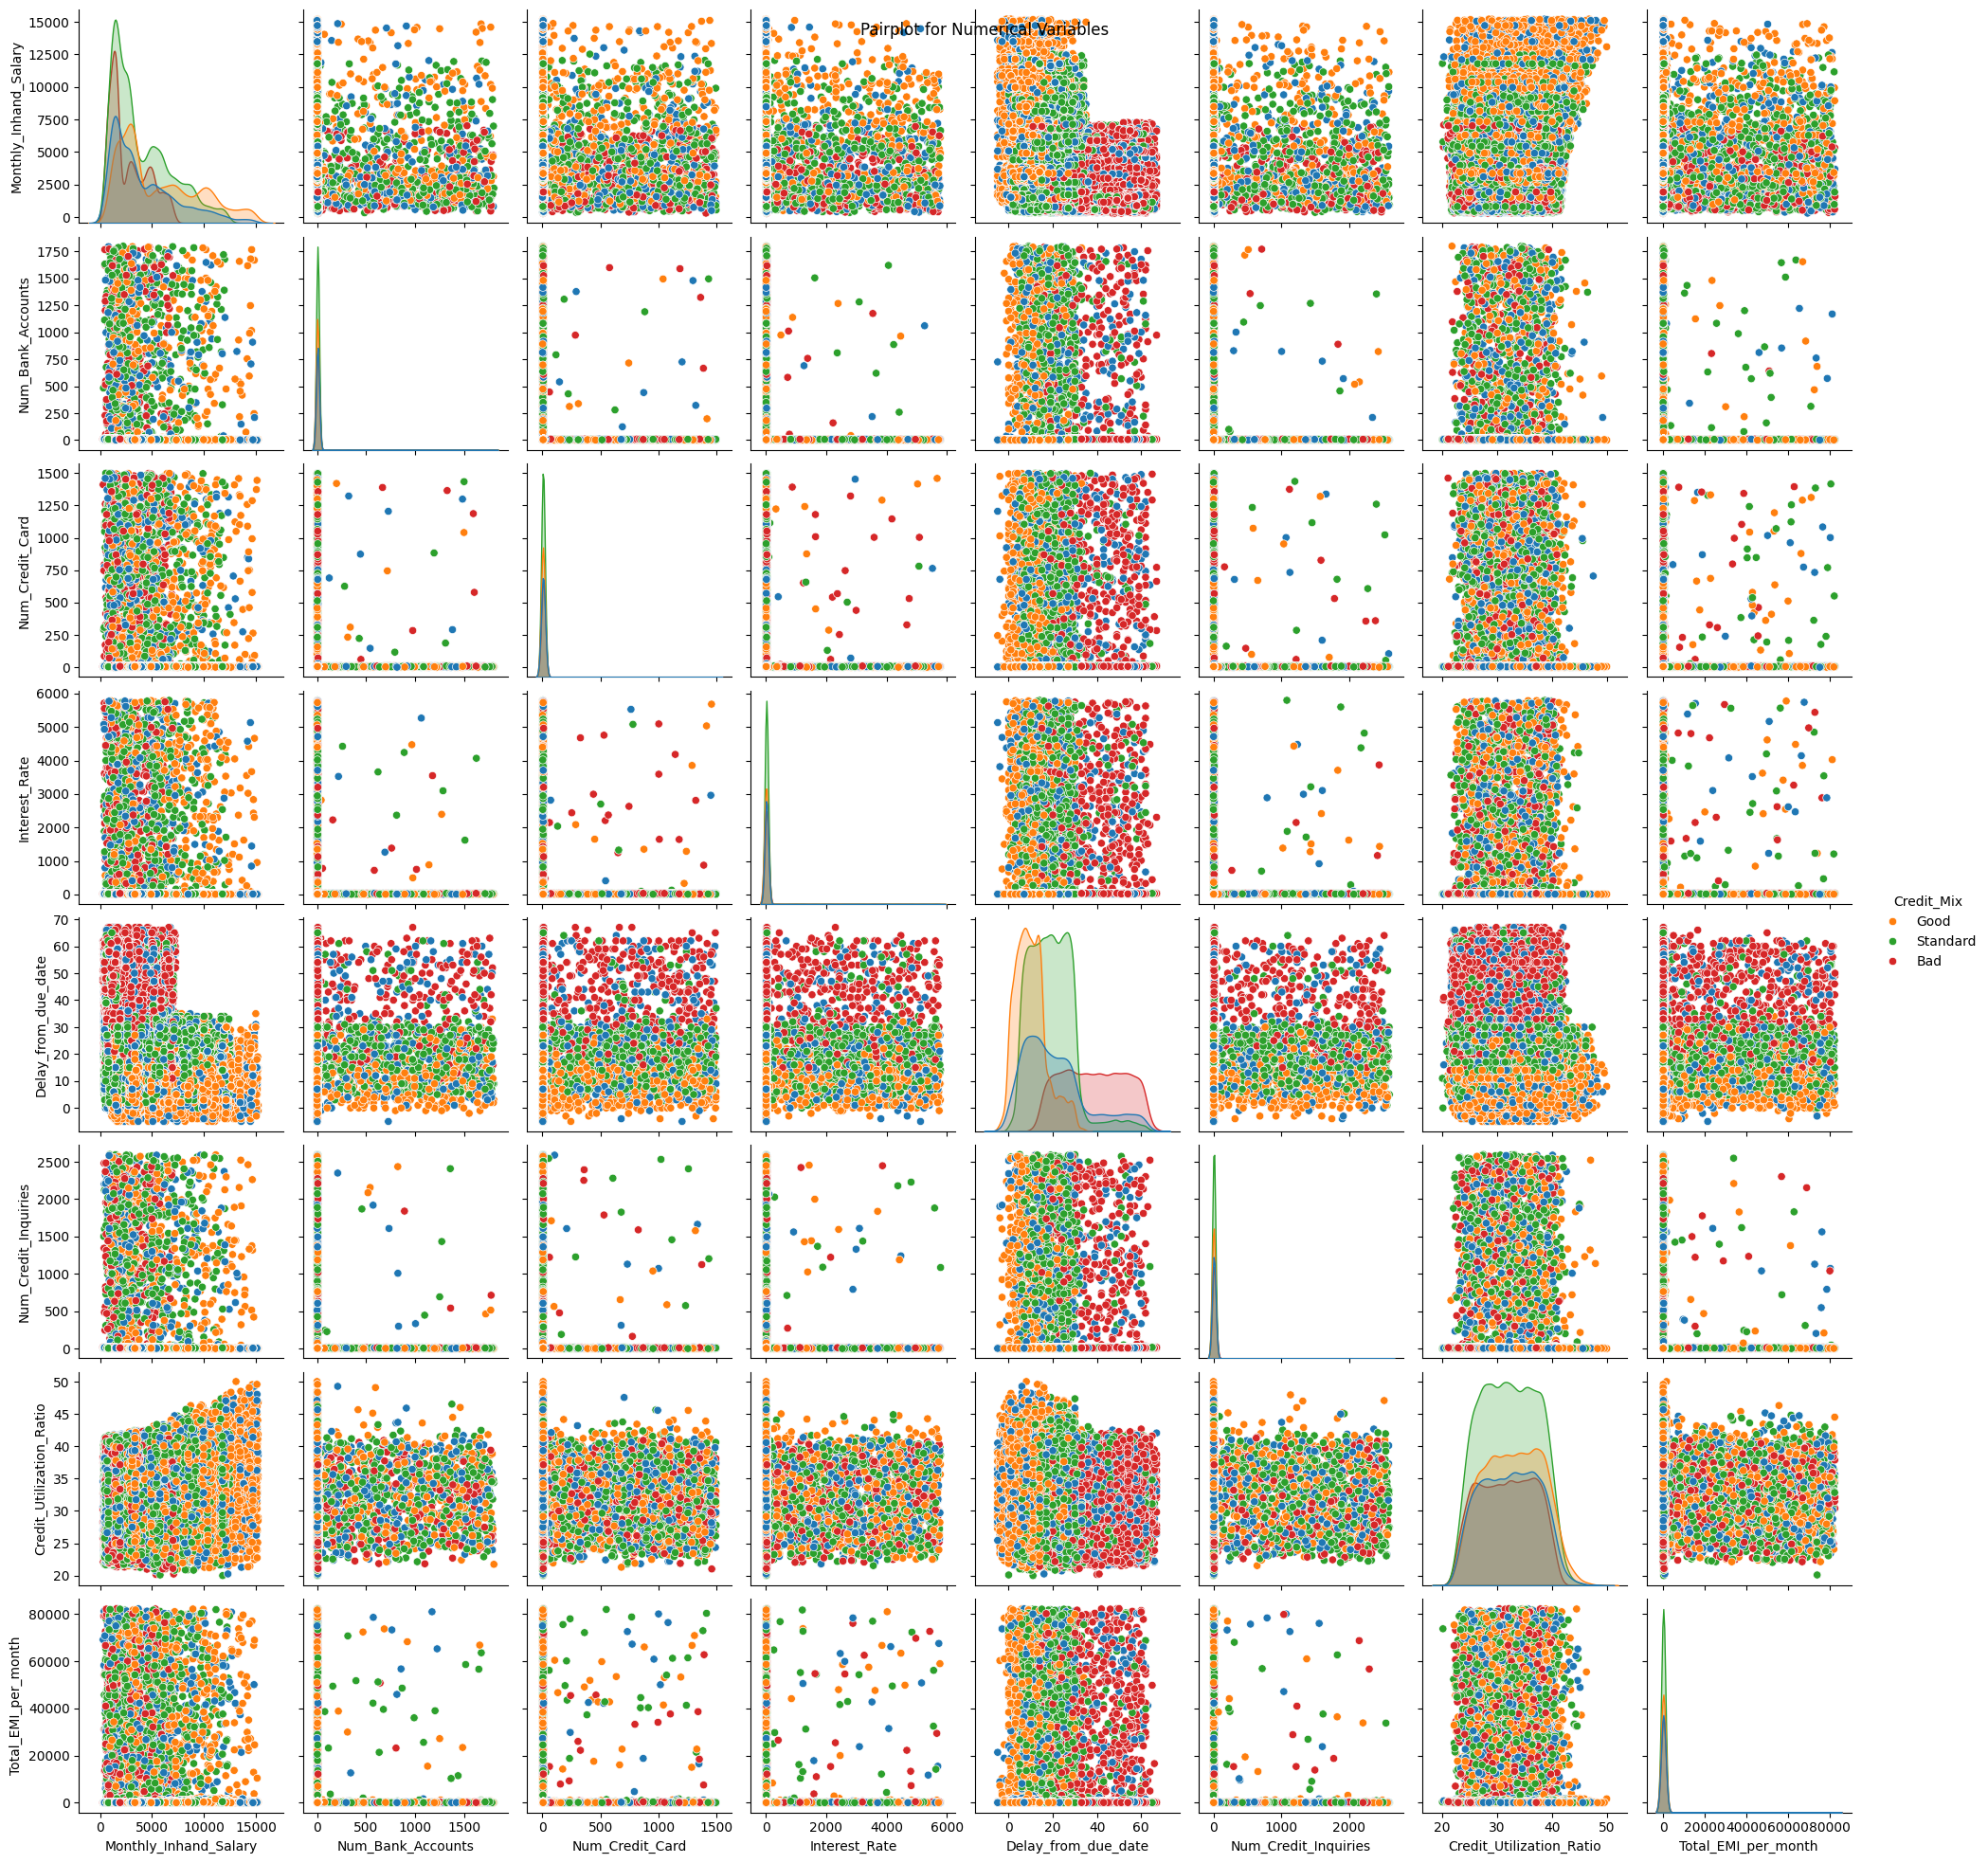

In [62]:
# Pairplot for exploring relationships between numerical variables
sns.pairplot(creditscore, hue='Credit_Mix')
plt.suptitle('Pairplot for Numerical Variables')
plt.show()

# Interpretation: Pairplots allow us to examine relationships between multiple numerical variables and detect patterns or clusters based on species.

In [63]:
print("\nCorrelation Matrix:\n")
# Select only numerical columns for correlation analysis
numerical_columns = creditscore.select_dtypes(include=['number'])
corr_matrix = numerical_columns.corr()
print(corr_matrix)

# Interpretation: This helps identify relationships between numerical variables.


Correlation Matrix:

                          Monthly_Inhand_Salary  Num_Bank_Accounts  \
Monthly_Inhand_Salary                  1.000000          -0.010819   
Num_Bank_Accounts                     -0.010819           1.000000   
Num_Credit_Card                       -0.005049          -0.002216   
Interest_Rate                         -0.006422          -0.003998   
Delay_from_due_date                   -0.250100           0.015966   
Num_Credit_Inquiries                  -0.008867          -0.001683   
Credit_Utilization_Ratio               0.173192          -0.001365   
Total_EMI_per_month                    0.007264          -0.001433   

                          Num_Credit_Card  Interest_Rate  Delay_from_due_date  \
Monthly_Inhand_Salary           -0.005049      -0.006422            -0.250100   
Num_Bank_Accounts               -0.002216      -0.003998             0.015966   
Num_Credit_Card                  1.000000      -0.004012             0.008715   
Interest_Rate          

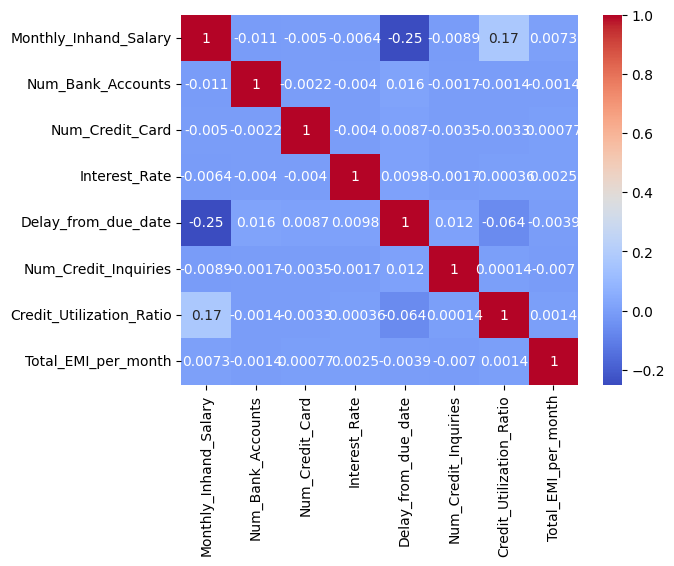

In [64]:
# Correlation heatmap for numerical columns
corr_matrix = creditscore.select_dtypes(include=['number']).corr() # Select only numerical columns for correlation calculation
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Interpretation: The correlation heatmap helps identify relationships between numerical variables.
# Interpretation: The correlation matrix shows that most variables have low or near-zero correlations with each other. The only slightly notable correlations are the negative correlation between Monthly_Inhand_Salary and Delay_from_due_date (-0.26), and the positive correlation between Monthly_Inhand_Salary and Credit_Utilization_Ratio (0.16).


<Axes: xlabel='Credit_Score', ylabel='Monthly_Inhand_Salary'>

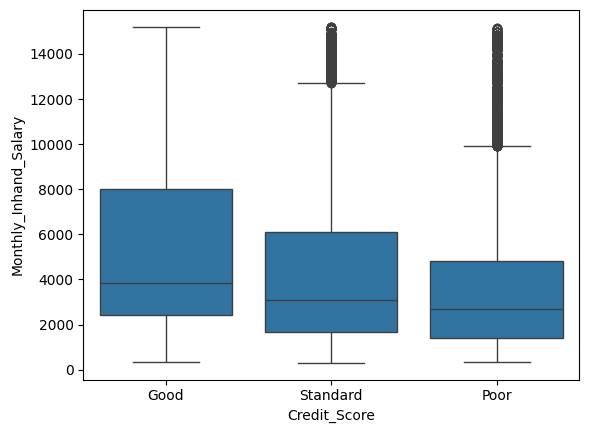

In [65]:
# The boxplot will show the Credit_Score distribution for Monthly_Inhand_Salary.
sns.boxplot(x='Credit_Score', y='Monthly_Inhand_Salary', data=creditscore)

# Interpretation: There is a positive correlation between credit score and monthly income: higher credit scores are generally linked to higher incomes.
# Interpretation: The Good credit score group shows greater income variability but fewer outliers, suggesting a stable income range.
# Interpretation: The Standard and Poor groups have more high-income outliers, which may indicate exceptions or potential data anomalies.

<Axes: xlabel='Credit_Mix', ylabel='Delay_from_due_date'>

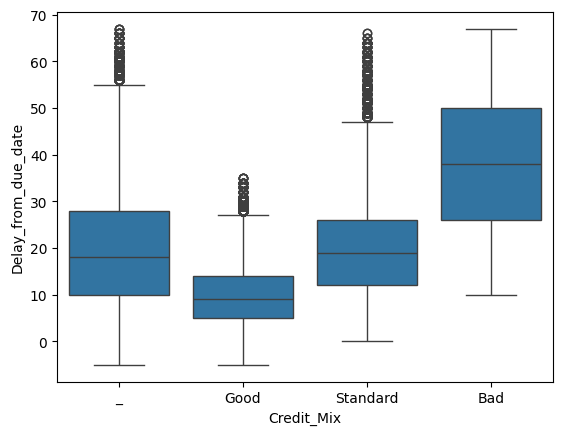

In [66]:
# The boxplot will show the age distribution for those who survived and those who didn't.
sns.boxplot(x='Credit_Mix', y='Delay_from_due_date', data=creditscore)

# Interpretation: People with better Credit_Mix will have fewer delay days.

<Axes: xlabel='Credit_Score', ylabel='Delay_from_due_date'>

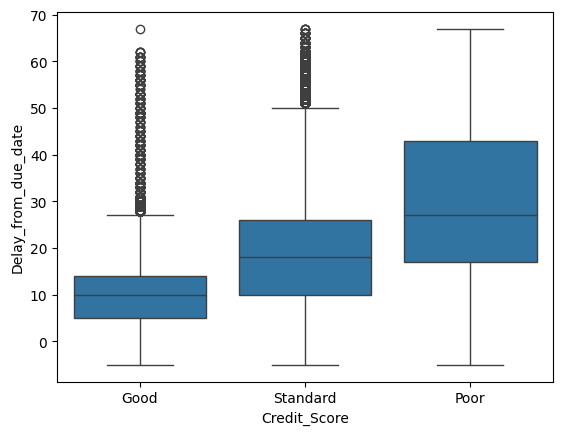

In [67]:
# The boxplot will show the age distribution for those who survived and those who didn't.
sns.boxplot(x='Credit_Score', y='Delay_from_due_date', data=creditscore)

# Interpretation: People with better Credit_Score will have fewer delay days.

<Axes: xlabel='Credit_Mix', ylabel='Delay_from_due_date'>

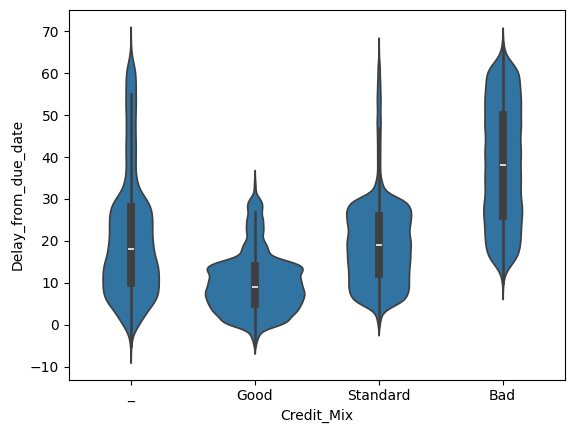

In [68]:
# The violin plot highlight the differences in age distribution among passengers in different classes.
sns.violinplot(x='Credit_Mix', y='Delay_from_due_date', data=creditscore)

# Interpretation: People with better Credit_Mix will have fewer delay days.

<Axes: xlabel='Credit_Score', ylabel='Interest_Rate'>

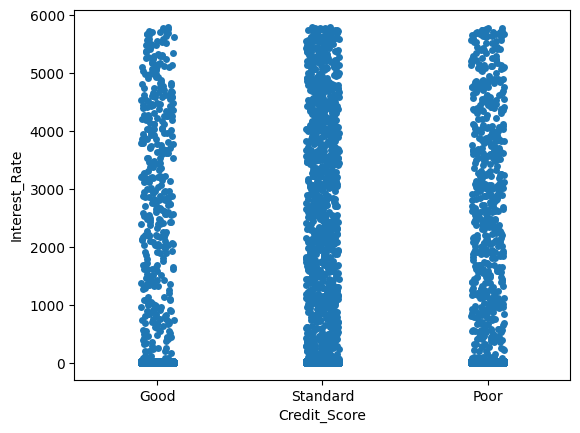

In [69]:
# The stripplot highlight the differences in fare distribution among passengers in different sex.
sns.stripplot(x='Credit_Score', y='Interest_Rate', data=creditscore, jitter=True)

# Interpretation: There is an inverse relationship between Credit_Score and Interest_Rate: higher credit scores (Good) tend to be associated with lower and less variable interest rates.

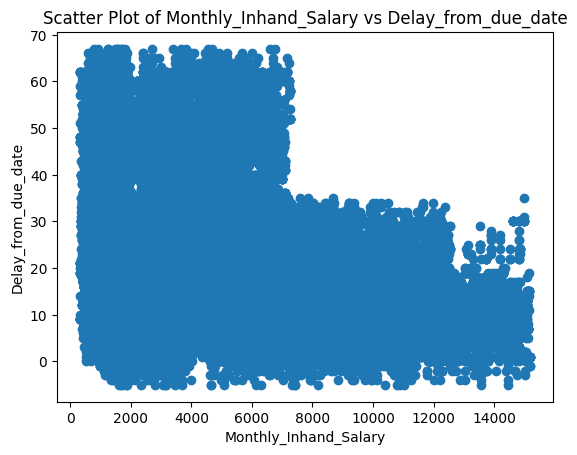

In [70]:
# Create a scatter plot
plt.scatter(creditscore['Monthly_Inhand_Salary'], creditscore['Delay_from_due_date'])
plt.xlabel('Monthly_Inhand_Salary')
plt.ylabel('Delay_from_due_date')
plt.title('Scatter Plot of Monthly_Inhand_Salary vs Delay_from_due_date')
plt.show()

# Interpretation: There is no distinct relation between Monthly_Inhand_Salary and Delay_from_due_date.

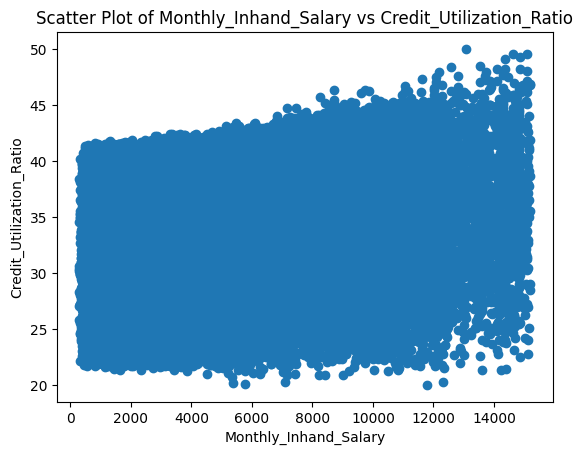

In [71]:
# Create a scatter plot
plt.scatter(creditscore['Monthly_Inhand_Salary'], creditscore['Credit_Utilization_Ratio'])
plt.xlabel('Monthly_Inhand_Salary')
plt.ylabel('Credit_Utilization_Ratio')
plt.title('Scatter Plot of Monthly_Inhand_Salary vs Credit_Utilization_Ratio')
plt.show()

# Interpretation: There is no distinct relation between Monthly_Inhand_Salary and Credit_Utilization_Ratio.

In [72]:
creditscore['Interest_Rate'] = pd.to_numeric(creditscore['Interest_Rate'], errors='coerce')
creditscore['Delay_from_due_date'] = pd.to_numeric(creditscore['Delay_from_due_date'], errors='coerce')
creditscore['Annual_Income'] = pd.to_numeric(creditscore['Annual_Income'], errors='coerce')
creditscore['Monthly_Balance'] = pd.to_numeric(creditscore['Monthly_Balance'], errors='coerce')

grouped_data = creditscore.groupby(['Credit_Score']).agg({
    'Interest_Rate': 'mean',
    'Delay_from_due_date': 'mean',
    'Annual_Income': 'mean',
    'Monthly_Balance': 'mean'
})

print(grouped_data)

# Interpretation: The Interest Rate increases significantly as the Credit Score declines from Good to Poor. This suggests that lower credit scores are associated with higher loan interest rates, likely due to the increased risk of default represented by a poor credit score.
# Interpretation: The Delay from Due Date is noticeably higher in the Poor category, indicating that customers with lower credit scores tend to have longer repayment delays.
# Interpretation: Both Annual Income and Monthly Balance are highest in the Good group and lowest in the Poor group. This implies that customers with better credit scores generally have higher incomes and more stable financial status.

              Interest_Rate  Delay_from_due_date  Annual_Income  \
Credit_Score                                                      
Good              73.958717            10.892753  190255.539092   
Poor              76.196772            29.744051  154497.416438   
Standard          69.931057            19.749577  187762.340268   

              Monthly_Balance  
Credit_Score                   
Good               475.865950  
Poor               345.662262  
Standard           409.040181  


##2. Data Cleaning


In [73]:
# Check for missing values in each column
creditscore.isnull().sum()

# Interpretation: This shows the number of missing values in each column, highlighting potential data quality issues that need to be addressed.

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                6980
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1209
Credit_Score                    0
dtype: int64

In [74]:
for column in creditscore.columns:
    if creditscore[column].dtype == 'object':
        creditscore[column] = creditscore[column].fillna(creditscore[column].mode()[0])
    else:
        creditscore[column] = creditscore[column].fillna(creditscore[column].median())

# Interpretation: Handle missing values. Fill the missing values ​​in the numeric field with the median and fill the category field with the mode.

In [75]:
# Check for missing values in each column
creditscore.isnull().sum()

# Interpretation: This shows the number of missing values in each column, highlighting potential data quality issues that need to be addressed.

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [76]:
creditscore['Credit_Score'] = creditscore['Credit_Score'].replace({'Good': 3, 'Standard': 2, 'Poor': 1})
print(creditscore['Credit_Score'].value_counts())

# Interpretation: Change the elements in Credit_Score into integer. Good = 3, Standard = 2, poor = 1.

Credit_Score
2    53174
1    28998
3    17828
Name: count, dtype: int64


<ipython-input-76-cf6e6bacaca3>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  creditscore['Credit_Score'] = creditscore['Credit_Score'].replace({'Good': 3, 'Standard': 2, 'Poor': 1})


In [77]:
creditscore['Credit_Mix'] = creditscore['Credit_Mix'].replace({'Good': 3, 'Standard': 2, 'Poor': 1})
print(creditscore['Credit_Score'].value_counts())

# Interpretation: Change the elements in Credit_Score into integer. Good = 3, Standard = 2, poor = 1.

Credit_Score
2    53174
1    28998
3    17828
Name: count, dtype: int64


In [78]:
# Display the first 5 rows
creditscore.head()

# Interpretation: This gives a preview of the first few rows of the dataset, which helps verify that the data was loaded correctly.

ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0       19114.12            1824.843333                  3  ...           _   
1       19114.12            3093.745000                  3  ...           3   
2       19114.12            3093.745000                  3  ...           3   
3       19114.12            3093.745000                  3  ...           3   
4       19114.12            1824.843333                  3  ...           3   

   Outstanding_Debt Credit_Utilization_Ratio      Credit_History_Age  \
0            809.98                26.822620   22 Years and 1 Months   
1            809.98                31.944960  15 Years and 11 Months   
2            809.98                28.609352   22 Years and 3 Months   
3            809.98                31.377862   22 Years and 4 Months   
4            809.98                24.797347   22 Years and 5 Months   

   Payment_of_Min_Amount Total_EMI_per_month Amount_invested_monthly  \
0                     No           49.574949       80.41529543900253   
1                     No           49.574949      118.28022162236736   
2                     No           49.574949         81.699521264648   
3                     No           49.574949       199.4580743910713   
4                     No           49.574949      41.420153086217326   

                  Payment_Behaviour Monthly_Balance Credit_Score  
0   High_spent_Small_value_payments      312.494089            3  
1    Low_spent_Large_value_payments      284.629162            3  
2   Low_spent_Medium_value_payments      331.209863            3  
3    Low_spent_Small_value_payments      223.451310            3  
4  High_spent_Medium_value_payments      341.489231            3  

[5 rows x 28 columns]

In [79]:
from scipy import stats

# Calculate Z-scores for Fare
creditscore['Age'] = creditscore['Age'].astype(str)
creditscore['Age'] = creditscore['Age'].str.replace(r'\D', '', regex=True)
creditscore['Age'] = creditscore['Age'].astype(int)
creditscore['z_score'] = stats.zscore(creditscore['Age'])

# Filter rows with Z-scores > 3 or < -3 (outliers)
tt_cleaned = creditscore[creditscore['z_score'].abs() < 3]
outliers = creditscore[creditscore['z_score'].abs() > 3]


# Interpretation: Z-scores help detect outliers by identifying values that are more than 3 standard deviations away from the mean.
# Interpretation: There are extreme values, particularly in the fare variable, that may distort average values and overall analysis.

In [80]:
tt_cleaned = tt_cleaned[(tt_cleaned['Age']>0) & (tt_cleaned['Age']<=100)]
tt_cleaned['Age'].unique()

# Interpretation: Set Age between 20-100

array([ 23,  28,  34,  54,  55,  21,  31,  33,  30,  24,  44,  45,  40,
        41,  32,  35,  36,  39,  37,  20,  46,  26,  42,  19,  48,  38,
        43,  22,  16,  18,  15,  27,  25,  14,  17,  47,  53,  56,  29,
        49,  51,  50,  52,  99, 100,  95])

In [81]:
# Remove outliers using the IQR method
Q1 = tt_cleaned[['Monthly_Inhand_Salary']].quantile(0.25)
Q3 = tt_cleaned[['Monthly_Inhand_Salary']].quantile(0.75)
IQR = Q3 - Q1

outlier_condition = ~((tt_cleaned[['Monthly_Inhand_Salary']] < (Q1 - 1.5 * IQR)) |
                      (tt_cleaned[['Monthly_Inhand_Salary']] > (Q3 + 1.5 * IQR))).any(axis=1)
data_cleaned = tt_cleaned[outlier_condition]
data_cleaned.head()

# Interpretation: There are higher Monthly_Inhand_Salary but in small numbers, outliers can be more effectively identified using the IQR method without being disturbed by extreme values.

ID Customer_ID     Month           Name  Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh   23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh   23  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh   23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh   23  821-00-0265  Scientist   
5  0x1607   CUS_0xd40      June  Aaron Maashoh   23  821-00-0265  Scientist   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0       19114.12            1824.843333                  3  ...   
1       19114.12            3093.745000                  3  ...   
3       19114.12            3093.745000                  3  ...   
4       19114.12            1824.843333                  3  ...   
5       19114.12            3093.745000                  3  ...   

   Outstanding_Debt  Credit_Utilization_Ratio      Credit_History_Age  \
0            809.98                 26.822620   22 Years and 1 Months   
1            809.98                 31.944960  15 Years and 11 Months   
3            809.98                 31.377862   22 Years and 4 Months   
4            809.98                 24.797347   22 Years and 5 Months   
5            809.98                 27.262259   22 Years and 6 Months   

  Payment_of_Min_Amount  Total_EMI_per_month Amount_invested_monthly  \
0                    No            49.574949       80.41529543900253   
1                    No            49.574949      118.28022162236736   
3                    No            49.574949       199.4580743910713   
4                    No            49.574949      41.420153086217326   
5                    No            49.574949      62.430172331195294   

                  Payment_Behaviour  Monthly_Balance Credit_Score   z_score  
0   High_spent_Small_value_payments       312.494089            3 -0.140941  
1    Low_spent_Large_value_payments       284.629162            3 -0.140941  
3    Low_spent_Small_value_payments       223.451310            3 -0.140941  
4  High_spent_Medium_value_payments       341.489231            3 -0.140941  
5                            !@9#%8       340.479212            3 -0.140941  

[5 rows x 29 columns]

In [82]:
# Remove outliers using the IQR method
Q1 = data_cleaned[['Age']].quantile(0.25)
Q3 = data_cleaned[['Age']].quantile(0.75)
IQR = Q3 - Q1

outlier_condition = ~((data_cleaned[['Age']] < (Q1 - 1.5 * IQR)) |
                      (data_cleaned[['Age']] > (Q3 + 1.5 * IQR))).any(axis=1)
data_cleaned = data_cleaned[outlier_condition]
data_cleaned['Age'].unique()

# Interpretation: There are older people, outliers can be more effectively identified using the IQR method without being disturbed by extreme values.

array([23, 28, 34, 54, 55, 21, 31, 30, 24, 44, 45, 40, 41, 32, 33, 35, 36,
       39, 37, 20, 46, 26, 42, 19, 48, 38, 43, 22, 16, 18, 15, 27, 25, 14,
       17, 47, 53, 29, 49, 51, 50, 52, 56])

In [83]:
# Remove outliers using the IQR method
data_cleaned['Delay_from_due_date'] = data_cleaned['Delay_from_due_date'].astype(str)
data_cleaned['Delay_from_due_date'] = data_cleaned['Delay_from_due_date'].str.replace(r'\D', '', regex=True)
data_cleaned['Delay_from_due_date'] = data_cleaned['Delay_from_due_date'].astype(int)
data_cleaned['z_score'] = stats.zscore(data_cleaned['Delay_from_due_date'])

Q1 = data_cleaned[['Delay_from_due_date']].quantile(0.25)
Q3 = data_cleaned[['Delay_from_due_date']].quantile(0.75)
IQR = Q3 - Q1

outlier_condition = ~((data_cleaned[['Delay_from_due_date']] < (Q1 - 1.5 * IQR)) |
                      (data_cleaned[['Delay_from_due_date']] > (Q3 + 1.5 * IQR))).any(axis=1)
data_cleaned = data_cleaned[outlier_condition]
data_cleaned['Delay_from_due_date'].unique()

# Interpretation: There are higher Delay_from_due_date but in small numbers, outliers can be more effectively identified using the IQR method without being disturbed by extreme values.

array([ 3,  1,  5,  6,  8,  7,  0,  4,  9, 10, 12, 11, 30, 31, 34, 27, 13,
       14,  2, 16, 17, 15, 23, 22, 21, 18, 19, 52, 51, 48, 53, 26, 43, 28,
       25, 20, 47, 46, 49, 24, 29, 45, 55, 54, 50, 36, 41, 33, 32, 39, 44,
       42, 35, 38, 40, 37])

In [84]:
columns_to_drop = ['ID','Customer_ID','Name','SSN','Month','Occupation']
data_cleaned = data_cleaned.drop(columns=columns_to_drop, axis = 1)
data_cleaned.head()

# Interpretation: Drop unnecessory columns

Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0   23       19114.12            1824.843333                  3   
1   23       19114.12            3093.745000                  3   
3   23       19114.12            3093.745000                  3   
4   23       19114.12            1824.843333                  3   
5   23       19114.12            3093.745000                  3   

   Num_Credit_Card  Interest_Rate Num_of_Loan  \
0                4              3           4   
1                4              3           4   
3                4              3           4   
4                4              3           4   
5                4              3           4   

                                        Type_of_Loan  Delay_from_due_date  \
0  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
1  Auto Loan, Credit-Builder Loan, Personal Loan,...                    1   
3  Auto Loan, Credit-Builder Loan, Personal Loan,...                    5   
4  Auto Loan, Credit-Builder Loan, Personal Loan,...                    6   
5  Auto Loan, Credit-Builder Loan, Personal Loan,...                    8   

  Num_of_Delayed_Payment  ... Outstanding_Debt  Credit_Utilization_Ratio  \
0                      7  ...           809.98                 26.822620   
1                     19  ...           809.98                 31.944960   
3                      4  ...           809.98                 31.377862   
4                     19  ...           809.98                 24.797347   
5                      4  ...           809.98                 27.262259   

       Credit_History_Age Payment_of_Min_Amount  Total_EMI_per_month  \
0   22 Years and 1 Months                    No            49.574949   
1  15 Years and 11 Months                    No            49.574949   
3   22 Years and 4 Months                    No            49.574949   
4   22 Years and 5 Months                    No            49.574949   
5   22 Years and 6 Months                    No            49.574949   

  Amount_invested_monthly                 Payment_Behaviour  Monthly_Balance  \
0       80.41529543900253   High_spent_Small_value_payments       312.494089   
1      118.28022162236736    Low_spent_Large_value_payments       284.629162   
3       199.4580743910713    Low_spent_Small_value_payments       223.451310   
4      41.420153086217326  High_spent_Medium_value_payments       341.489231   
5      62.430172331195294                            !@9#%8       340.479212   

  Credit_Score   z_score  
0            3 -1.242728  
1            3 -1.376798  
3            3 -1.108658  
4            3 -1.041623  
5            3 -0.907553  

[5 rows x 23 columns]

In [85]:
# Display the data types
data_cleaned.dtypes

# Interpretation: Identify the name and type (continuous or categorical) for each variable in the dataset.

Age                           int64
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                  int64
z_score                     float64
dtype: object

##3. Feature Engineering

In [86]:
data_cleaned['Monthly_Expense_Ratio'] = data_cleaned['Total_EMI_per_month'] / data_cleaned['Monthly_Inhand_Salary']

# Interpretation: Use Monthly Salary and Total Monthly EMI to create a monthly expense ratio, which can indicate the proportion of a person’s disposable income

In [87]:
data_cleaned['Monthly_Inhand_Salary_Delay_from_due_date'] = data_cleaned['Monthly_Inhand_Salary'] * data_cleaned['Delay_from_due_date']

# Interpretation: According to the correlation Matrix, Monthly_Inhand_Salary and Delay_from_due_date have slightly higher correlation. This feature may jointly affect credit score.

In [88]:
data_cleaned['Monthly_Inhand_Salary_Credit_Utilization_Ratio'] = data_cleaned['Monthly_Inhand_Salary'] * data_cleaned['Credit_Utilization_Ratio']

# Interpretation: According to the correlation Matrix, Monthly_Inhand_Salary and Credit_Utilization_Ratio have slightly higher correlation. This feature may jointly affect credit score.

In [89]:
data_cleaned['Credit_Utilization_Level'] = pd.cut(
    creditscore['Credit_Utilization_Ratio'], bins=[0, 30, 70, 100], labels=['Low', 'Medium', 'High'], include_lowest=True
)
data_cleaned['Credit_Utilization_Level'].describe()

# Interpretation: Binning credit card utilization, lower utilization may indicate better credit profile

count      89076
unique         2
top       Medium
freq       56167
Name: Credit_Utilization_Level, dtype: object

In [90]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Delay_from_due_date', 'Num_Credit_Inquiries', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'z_score', 'Monthly_Expense_Ratio', 'Monthly_Inhand_Salary_Delay_from_due_date', 'Monthly_Inhand_Salary_Credit_Utilization_Ratio']
scaler = StandardScaler()
data_cleaned[numerical_features] = scaler.fit_transform(data_cleaned[numerical_features])
data_cleaned.head()

# Interpretation: Standardizes specified numerical features

Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0   23       19114.12              -0.767734          -0.120401   
1   23       19114.12              -0.243063          -0.120401   
3   23       19114.12              -0.243063          -0.120401   
4   23       19114.12              -0.767734          -0.120401   
5   23       19114.12              -0.243063          -0.120401   

   Num_Credit_Card  Interest_Rate Num_of_Loan  \
0        -0.143046      -0.148708           4   
1        -0.143046      -0.148708           4   
3        -0.143046      -0.148708           4   
4        -0.143046      -0.148708           4   
5        -0.143046      -0.148708           4   

                                        Type_of_Loan  Delay_from_due_date  \
0  Auto Loan, Credit-Builder Loan, Personal Loan,...            -1.307094   
1  Auto Loan, Credit-Builder Loan, Personal Loan,...            -1.461914   
3  Auto Loan, Credit-Builder Loan, Personal Loan,...            -1.152275   
4  Auto Loan, Credit-Builder Loan, Personal Loan,...            -1.074865   
5  Auto Loan, Credit-Builder Loan, Personal Loan,...            -0.920046   

  Num_of_Delayed_Payment  ... Total_EMI_per_month  Amount_invested_monthly  \
0                      7  ...           -0.161847        80.41529543900253   
1                     19  ...           -0.161847       118.28022162236736   
3                      4  ...           -0.161847        199.4580743910713   
4                     19  ...           -0.161847       41.420153086217326   
5                      4  ...           -0.161847       62.430172331195294   

                  Payment_Behaviour Monthly_Balance  Credit_Score   z_score  \
0   High_spent_Small_value_payments      312.494089             3 -1.307094   
1    Low_spent_Large_value_payments      284.629162             3 -1.461914   
3    Low_spent_Small_value_payments      223.451310             3 -1.152275   
4  High_spent_Medium_value_payments      341.489231             3 -1.074865   
5                            !@9#%8      340.479212             3 -0.920046   

  Monthly_Expense_Ratio  Monthly_Inhand_Salary_Delay_from_due_date  \
0             -0.118682                                  -1.029050   
1             -0.121003                                  -1.068429   
3             -0.121003                                  -0.863746   
4             -0.118682                                  -0.938501   
5             -0.121003                                  -0.710233   

  Monthly_Inhand_Salary_Credit_Utilization_Ratio Credit_Utilization_Level  
0                                      -0.836737                      Low  
1                                      -0.248742                   Medium  
3                                      -0.269423                   Medium  
4                                      -0.880302                      Low  
5                                      -0.419510                      Low  

[5 rows x 27 columns]

In [93]:
print("\nCorrelation Matrix:\n")
# Select only numerical columns for correlation analysis
numerical_columns = data_cleaned.select_dtypes(include=['number'])
corr_matrix = numerical_columns.corr()
print(corr_matrix)

# Interpretation: This helps identify relationships between numerical variables, and highlights multicollinearity.
# Interpretation: Monthly_Inhand_Salary_Credit_Utilization_Ratio and Monthly_Balance are high correlation.


Correlation Matrix:

                                                     Age  Annual_Income  \
Age                                             1.000000       0.005557   
Annual_Income                                   0.005557       1.000000   
Monthly_Inhand_Salary                           0.067009       0.022532   
Num_Bank_Accounts                               0.000427      -0.004717   
Num_Credit_Card                                -0.003318       0.003189   
Interest_Rate                                  -0.001505      -0.003444   
Delay_from_due_date                            -0.170969      -0.010164   
Num_Credit_Inquiries                           -0.006596      -0.000834   
Credit_Utilization_Ratio                        0.020673       0.008210   
Total_EMI_per_month                             0.000185      -0.002712   
Monthly_Balance                                 0.111481       0.016577   
Credit_Score                                    0.157394       0.007308   
z_s

In [92]:
# Save the cleaned dataset to a new CSV file
data_cleaned.to_csv('cleaned_creditscore.csv', index=False)

# Interpretation: This saves the cleaned dataset, ensuring that the modifications, such as imputed missing values and removed outliers, are preserved.

## 4. Report Preparation

In this data processing and feature engineering process, my main goal was to create a clean, reliable, and information-rich dataset for subsequent model training and prediction. To achieve this, I conducted data cleaning, missing value handling, feature engineering, and data standardization, all of which enhance the model's learning effectiveness and improve its ability to predict credit scores. My cleaning process addressed missing and outliers to ensure data consistency and completeness, preventing the model from being biased due to data defects.

In terms of feature engineering, new features like "Monthly Expense Ratio" and "Credit Utilization Level" provided additional financial pressure and behavioral insights, helping the model identify high-risk users more effectively. To ensure the model can accurately interpret categorical data, I transformed key categorical variables into numerical formats where necessary. Additionally, standardizing numerical features enabled all features to perform on a similar scale, positively impacting model convergence and prediction stability.